In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from IPython.display import clear_output
%matplotlib inline

# BUILDING DATASET


**DETECT FACE**

In [2]:
def detect_face(frame):
    detector = cv2.CascadeClassifier("xml/frontal_face.xml")
    
    faces = detector.detectMultiScale(frame,scaleFactor=1.3,minNeighbors=3)
    
    return faces


**CUT FACE**

In [3]:
def cut_faces(image,faces_coord):
    faces = []
    
    for (x,y,w,h) in faces_coord:
        faces.append(image[y:y+h,x:x+h])
    
    return faces

** Normalize faces by increasing pixel density(brightness) **

In [4]:
def normalize_intensity(images):
        images_norm=[]
        for image in images:
            is_color = len(image.shape)==3
            if is_color:
                image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            images_norm.append(cv2.equalizeHist(image))
        
        return images_norm
                

**RESIZE FACE **

In [5]:
def resize(images,size=(47,62)):
    image_resize = []
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
    return image_resize

**cv.INTER_CUBIC for zooming and cv.INTER_AREA for shrinking**

**MAKE PIPELINE**

In [6]:
def normalize_faces(frame,faces_coord):
    faces = cut_faces(frame,faces_coord)
    faces = normalize_intensity(faces)
    faces=resize(faces)
    return faces

In [7]:
def plot_show(image,title=""):
    if len(image.shape)==3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show

In [8]:
def draw_rectangle(image,coords):
    for (x,y,w,h) in coords:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    

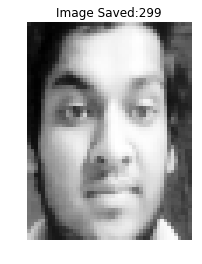

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

%matplotlib inline

cam = cv2.VideoCapture(0)
folder = "people/"+input('Person:').lower()



if not os.path.exists(folder):
    os.mkdir(folder)


    
    flag_start_capturing=False
    sample=1
    cv2.namedWindow("Face",cv2.WINDOW_AUTOSIZE)
    
    while True:
        ret,frame = cam.read()
        
        faces_coord= detect_face(frame)
        
        if len(faces_coord):
            faces = normalize_faces(frame,faces_coord)
            cv2.imwrite(folder+'/'+str(sample)+'.jpg',faces[0])
            plot_show(faces[0],"Image Saved:"+str(sample))
            clear_output(wait=True)
            
        draw_rectangle(frame,faces_coord)
        cv2.imshow('Face',frame)
        keypress=cv2.waitKey(1)
        
        if keypress==ord('c'):
            if flag_start_capturing==False:
                flag_start_capturing=True
            else:
                flag_start_capturing=False
                sample=0
                
        if flag_start_capturing==True:
            sample+=1
        if sample==300:
            break
        
    cam.release()
    cv2.destroyAllWindows()
else:
    print("This Name already exists")
    
            

In [10]:
basepath = "C:\\Users\\hp\\scikit_learn_data\\lfw_home\\lfw_funneled"

images = os.listdir(basepath)
print(len(images))
data = images[:210]

for i,folder in enumerate(data,start=1):
    
    files= os.listdir(basepath+'\\'+folder)
    for k,img in enumerate(files,start=1):
        if img.endswith('.jpg'):
            frame = cv2.imread(basepath+'\\'+folder+'\\'+img,0)
            
            face_coord=detect_face(frame)
            if len(face_coord):
                faces = cut_faces(frame,face_coord)
                
                faces = normalize_intensity(faces)
                faces = resize(faces)
                cv2.imwrite('people/unknown/'+str(i)+'.jpg',faces[0])
                
                break

5760


In [11]:
def collect_dataset():
    images=[]
    labels=[]
    labels_dic={}
    
    people = [person for person in os.listdir("people/")]
    for i,person in enumerate(people):
        labels_dic[i]=person
        for image in os.listdir("people/"+person):
            if image.endswith('.jpg'):
                images.append(cv2.imread("people/"+person+'/'+image,0))
                labels.append(i)
    return (images,np.array(labels),labels_dic)
                              

In [12]:
images,labels,labels_dic = collect_dataset()

In [13]:
images[0].shape

(62, 47)

In [14]:
print(len(images))
print(labels_dic)
print(labels)

504
{0: 'akshat', 1: 'unknown'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [15]:
X_train = np.asarray(images)

In [16]:
X_train.shape

(504, 62, 47)

In [17]:
train = X_train.reshape(len(X_train),-1)

In [18]:
train.shape

(504, 2914)

In [19]:
from sklearn.decomposition import PCA

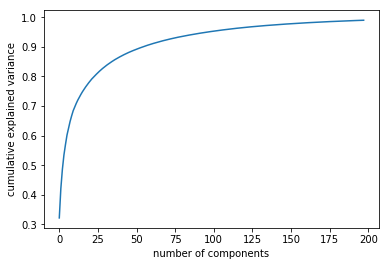

In [20]:
pca1 = PCA(n_components=.99)
pca1.fit(train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
pca1 = PCA(n_components=.99)
new_train=pca1.fit_transform(train)

In [22]:
pca1.n_components_

198

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(train,labels,test_size=0.2)

In [25]:
X_train.shape

(403, 2914)

In [26]:
X_test.shape

(101, 2914)

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train = sc_X.fit_transform(train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
pca = PCA(n_components=200)

In [29]:
X_new = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
X_new.shape

(403, 200)

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_new,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svm.score(X_test,y_test)

1.0

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold

In [34]:
param_grid = {'C':[.0001,.001,.01,.1,1,10]}

In [35]:
kf=KFold(n_splits=5,shuffle=True)

In [36]:
gs_svc = GridSearchCV(SVC(kernel='linear',probability=True),param_grid=param_grid,cv=kf,scoring='accuracy')

In [37]:
gs_svc.fit(new_train,labels)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
gs_svc.best_score_

0.99801587301587302

In [39]:
gs_svc.best_params_

{'C': 0.0001}

In [40]:
svc1 = gs_svc.best_estimator_

In [41]:
import pickle

filename = 'svc_face.pkl'
f=open(filename, 'wb')
pickle.dump(svc1,f)
 

f.close()


In [42]:
import pickle

filename = 'svc_face.pkl'
svc1 = pickle.load(open(filename, 'rb'))

In [43]:
cam = cv2.VideoCapture(0)
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)



while True:
    ret,frame = cam.read()
    
    
    faces_coord = detect_face(frame) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(frame, faces_coord)
        #faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            
            
            #cv2.imwrite('trainingData/female/picture_BGR5.jpg',face)
            test = pca1.transform(face.reshape(1,-1))    
            #print test
            #transform = test.reshape(1,-1)
            #print transform
            prob=svc1.predict_proba(test)
            confidence = svc1.decision_function(test)
            print (confidence)
            print (prob)
           
            
            
            pred = svc1.predict(test)
            print (pred,pred[0])
           
            name=labels_dic[pred[0]].capitalize()
            print (name)
            
            #pred = labels_dic[pred[0]].capitalize()
            #threshold = .50
            
            if confidence>1.0:
                
                cv2.putText(frame, 'UNKNOWN',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
            else:
                cv2.putText(frame,'AKSHAT',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                
                
            #cv2.putText(frame,name,(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
            
               
           #cv2.putText(frame,'Unknown',(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "ESC to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,
                cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == 27:
        break
        
cam.release()
cv2.destroyAllWindows()

[-0.40166347]
[[ 0.85999968  0.14000032]]
[0] 0
Akshat
[ 0.43339637]
[[ 0.12986409  0.87013591]]
[1] 1
Unknown
